In [1]:
import numpy as np
import hapke
import matplotlib.pyplot as plt
from scipy import optimize

NameError: name 'wav_int' is not defined

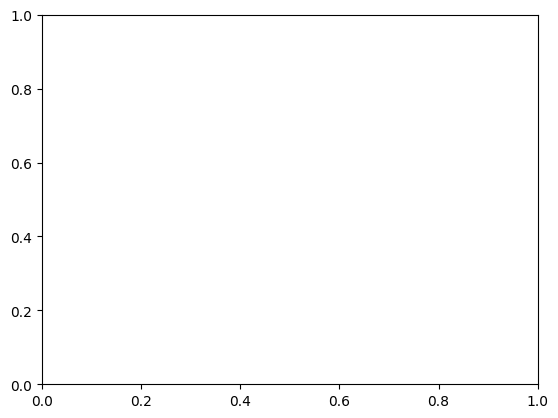

In [2]:
T = 80

n = hapke.opticalconstants(T)['n']
k = hapke.opticalconstants(T)['k']
wav = hapke.opticalconstants(T)['wav']

n2 = hapke.opticalconstants(T,crystallinity=False)['n']
k2 = hapke.opticalconstants(T,crystallinity=False)['k']
wav2 = hapke.opticalconstants(T,crystallinity=False)['wav']

int_opt = hapke.inter_optical_constants(wav, wav2, n, k)

wav = int_opt['wav']
n = int_opt['n']
k = int_opt['k']

fig, ax = plt.subplots()
ax.plot(wav_int, n_int, label='n int')
ax.plot(wav_int, k_int, label='k int')
ax.plot(wav, n, label='n')
#ax.plot(wav, k, label='k')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Index of Refraction')
ax.set_title(f'Crystalline Ice at 20 K')
ax.legend()
plt.show()

In [ ]:
# TESTING OF THE TWO IMPLEMENTATIONS OF SHOE: ONE WITH CONSTANT AND WAVELENGTH DEPENDENT SHOE AMPLITUDE

phi, D, theta_bar = [0.35, 10 ** (-5), np.deg2rad(15)]
eme, inc, phase = [np.deg2rad(40), np.deg2rad(30), np.deg2rad(15)]
parameters = [phi, D, theta_bar]
angles = [eme, inc, phase]

result = hapke.hapke_model(parameters,wav,angles, n, k)['IF']
result2 = hapke.hapke_model2(parameters,wav,angles, n, k)['IF']

angles2 = [eme, inc, np.deg2rad(70)]

result3 = hapke.hapke_model(parameters,wav,angles2, n, k)['IF']
result4 = hapke.hapke_model2(parameters,wav,angles2, n, k)['IF']

fig, ax = plt.subplots()
ax.plot(wav, result, label='Model 1')
ax.plot(wav, result2, label='Model 2')
ax.plot(wav, result3, ls = '--', label='Model 3')
ax.plot(wav, result4, ls = '--', label='Model 4')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('I/F')
ax.set_title(f'Crystalline Ice at 80 K')
ax.legend()
plt.show()

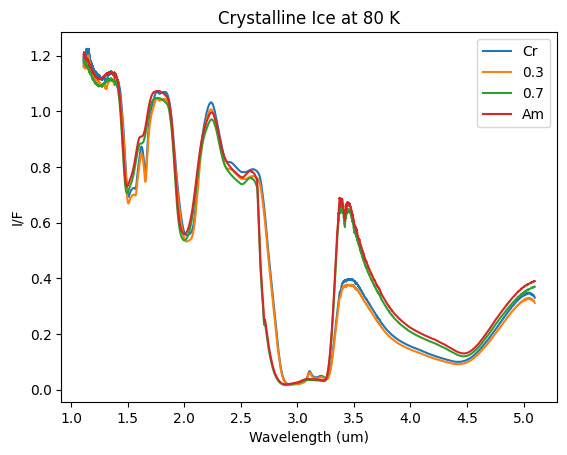

In [12]:
# TESTING OF THE MIXED I/F

phi, D, theta_bar, mass_fraction = [0.35, 10 ** (-5), np.deg2rad(15), 0]
eme, inc, phase = [np.deg2rad(40), np.deg2rad(30), np.deg2rad(70)]
parameters = [phi, D, theta_bar, mass_fraction]
angles = [eme, inc, phase]

result = hapke.hapke_model_mixed(parameters,wav,angles, n, k, n2, k2)['IF']

re_c = hapke.hapke_model(parameters[:-1],wav,angles,n,k)['IF']
re_am = hapke.hapke_model(parameters[:-1],wav,angles,n2,k2)['IF']

parameters = [phi, D, theta_bar, 1]


result2 = hapke.hapke_model_mixed(parameters,wav,angles, n, k, n2, k2)['IF']

fig, ax = plt.subplots()
ax.plot(wav, re_c, label='Cr')
ax.plot(wav, result, label='0.3')
ax.plot(wav, result2, label='0.7')
ax.plot(wav, re_am, label='Am')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('I/F')
ax.set_title(f'Crystalline Ice at 80 K')
ax.legend()
plt.show()

In [ ]:
phi, D, theta_bar = [0.35, 10 ** (-5), np.deg2rad(15)]
eme, inc, phase = [np.deg2rad(40), np.deg2rad(30), np.deg2rad(15)]

parameters = [phi, D, theta_bar]
angles = [eme, inc, phase]

w = hapke.singlescatteringalbedo(n,k,wav,D)

H = hapke.H(w,np.cos(eme))

result = hapke.hapke_model(parameters,wav,angles, n, k)

IF = result['IF']

fig, ax = plt.subplots()
#ax.plot(wavelength_range1, H, label='lambda')
ax.plot(wav, H, label='H')
ax.plot(wav, w, label='w')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('Index of Refraction')
ax.set_title(f'Crystalline Ice at 20 K')
ax.legend()
plt.show()

In [ ]:
B_C0 = 0.35
meanfreepath = 33 * 10 ** (-6)
g_values_deg = np.linspace(0.1, 10, 150)
g_values = [np.deg2rad(g) for g in g_values_deg]

K = hapke.porosityparameter(0.35)

wavelength = np.linspace(1, 5, 5)

cboe = np.empty((len(g_values),len(wavelength)))

for j in range(len(wavelength)):
    for i in range(len(g_values)):
        cboe[i,j] = hapke.cboe(B_C0,meanfreepath,wavelength[j],g_values[i],K)

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(wavelength)):
    ax.plot(g_values_deg, cboe[:,i], label = f'$\lambda$ = {wavelength[i]} $\mu$m')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Phase angle [deg]', fontsize = 12)
ax.set_ylabel(f'CBOE', fontsize = 12)
ax.set_title('')
ax.legend(fontsize = 12)
plt.show()

In [ ]:
B_S0 = 0.35
phi_range = np.linspace(0.1, 0.75, 5)
g_values_deg = np.linspace(0.1, 180, 150)
g_values = [np.deg2rad(g) for g in g_values_deg]


shoe = np.empty((len(g_values),len(phi_range)))

for j in range(len(phi_range)):
    for i in range(len(g_values)):
        shoe[i,j] = hapke.shoe(B_S0,phi_range[j],g_values[i])

fig, ax = plt.subplots(figsize=(6, 6))
for i in range(len(wavelength)):
    ax.plot(g_values_deg, shoe[:,i], label = f'$\phi$ = {phi_range[i]:.2f}')
plt.tick_params(axis='x', which='major', labelsize=12)
plt.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlabel('Phase angle [deg]', fontsize = 12)
ax.set_ylabel(f'SHOE', fontsize = 12)
ax.set_title('')
ax.legend(fontsize = 12)
plt.show()

In [ ]:
# EXAMPLE OF APPLICATION OF HAPKE MODEL WITH A SINGLE INPUT

i = np.deg2rad(53.01319710728901)
e = np.deg2rad(49.93917887149129)
g = np.deg2rad(30.39452822011539)

psi = hapke.phasetoazimuth(g,e,i)
mu = np.cos(e)
mu_0 = np.cos(i)

D = 10 ** (-6)

theta_bar= np.deg2rad(30)

phi = 0.35

B_S0 = 0.53
b = 0.2
B_C0 = 0.35

transport_mean_free_path = 33 * 10 ** (-6)

K = hapke.porosityparameter(phi)
h_S = 3* K * phi/ 8

B_SH = hapke.shoe(B_S0,phi,g)
c = hapke.hockey_stick(b)

p = hapke.phase_function(b, c, g)
[mu_0e, mu_e, S] = hapke.shadowingfunction(i, e, psi, theta_bar)



w = []
for i in range(len(n)):
    w.append(hapke.singlescatteringalbedo(n[i], k[i], wav[i], D))

B_CB = []
for i in range(len(wav)):
    B_CB.append(hapke.cboe(B_C0,transport_mean_free_path,wav[i],g,K))

r = []
for i in range(len(wav)):
    r.append(K * w[i]/(4*np.pi) * mu_0e/(mu_0e + mu_e) * (p * B_SH + hapke.H(w[i], mu_0e) * hapke.H(w[i], mu_e) - 1) * B_CB[i] * S)

IF1 = []
for i in range(len(wav)):
    IF1.append(r[i]*np.pi)


w2 = []
for i in range(len(n2)):
    w2.append(hapke.singlescatteringalbedo(n2[i], k2[i], wav2[i], D))

B_CB2 = []
for i in range(len(wav2)):
    B_CB2.append(hapke.cboe(B_C0,transport_mean_free_path,wav2[i],g,K))

r2 = []
for i in range(len(wav2)):
    r2.append(K * w2[i]/(4*np.pi) * mu_0e/(mu_0e + mu_e) * (p * B_SH + hapke.H(w2[i], mu_0e) * hapke.H(w2[i], mu_e) - 1) * B_CB2[i] * S)

IF2 = []
for i in range(len(wav2)):
    IF2.append(r2[i]*np.pi)

massfraction_am = 0.5

w_mix = hapke.singlescatteringalbedomixed(massfraction_am,w,w2[1:])
phase_mix = hapke.phasefunctionmixed(massfraction_am,w,w2[1:],p,p)
S_c = np.empty(len(n))
S_am = np.empty(len(n2))

for i in range(len(n)):
    S_c = ((n[i] - 1) ** 2 + k[1] ** 2) / ((n[1] + 1) ** 2 + k[1] ** 2)

for i in range(len(n2)):
    S_am = ((n2[i] - 1) ** 2 + k2[1] ** 2) / ((n2[1] + 1) ** 2 + k2[1] ** 2)

r3 = []
for i in range(len(wav)):
    r3.append(K * w_mix[i]/(4*np.pi) * mu_0e/(mu_0e + mu_e) * (phase_mix[i] * 1 + hapke.H(w_mix[i], mu_0e) * hapke.H(w_mix[i], mu_e) - 1) * 1 * S)

IF3 = np.array(r3) * np.pi


fig, ax = plt.subplots()
ax.plot(wav, IF1, label = 'IF1')
ax.plot(wav2, IF2, label = 'IF2')
ax.plot(wav, IF3, label = 'IF3')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('I/F')
ax.set_title('')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.plot(wav2, w2, label = 'w am')
ax.plot(wav, w, label = 'w c')
ax.plot(wav, w_mix, label = 'mix w')
ax.set_xlabel('Wavelength (um)')
ax.set_ylabel('I/F')
ax.set_title('')
ax.legend()
plt.show()